<a href="https://colab.research.google.com/github/EugeniaBar/Calidad-del-aire/blob/main/Calidad_del_Aire_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_csv("AirQualityUCI.csv", sep=',', header=0)

# Exploración inicial

In [ ]:
print(len(datos))         # Número de filas (

print(datos.shape)        # (filas, columnas)

9471
(9471, 1)


In [ ]:
datos.dtypes

,0
Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;,object


In [ ]:
datos.columns

Index(['Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;'], dtype='object')

In [ ]:
# Inspeccionar las primeras filas y estadísticas básicas
print("-Datos combinados:")
print(datos.head())

-Datos combinados:
                                                                                                            Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9     

In [ ]:
# Estadísticas descriptivas para entender la distribución de los datos
print ("-Descripcion")
print(datos.describe())

-Descripcion
       Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
count                                                6915                                                                          
unique                                               4941                                                                          
top                                                7487;;                                                                          
freq                                                    6                                                                          


In [ ]:
datos.isnull().sum()      # Nulos por columna


,0
Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;,2556


#Limpieza

Limpieza de datos
Se realizaron las siguientes tareas de limpieza para preparar el dataset:

1. Identificación de valores faltantes: se detectó que el valor -200 se utilizó como código para indicar mediciones inválidas o ausentes en varias columnas del dataset. Para facilitar el análisis posterior, estos valores fueron reemplazados por NaN.

2. Conversión de fecha y hora: las columnas Date y Time estaban en formato de texto, lo cual dificultaba su análisis temporal. Por ello, se unificaron y se transformaron en una nueva columna Datetime, con formato datetime, permitiendo trabajar con fechas y horas de forma eficiente.

In [ ]:
import pandas as pd

datos = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
datos = datos.iloc[:, :-2]  # Eliminar columnas vacías
datos.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
# Reemplazo de valores inválidos (-200) por NaN
datos.replace(-200, np.nan, inplace=True)

# Eliminar columnas con demasiados NaNs
datos.dropna(axis=1, thresh=int(len(datos)*0.7), inplace=True)


Las columnas Date y Time están como texto.

y convertirlas a un formato de fecha real (datetime)

In [ ]:
datos['Datetime'] = pd.to_datetime(datos['Date'] + ' ' + datos['Time'], format='%d/%m/%Y %H.%M.%S')


Verificar los cambios

In [ ]:
# Verificar cambios
print(datos[['Date', 'Time', 'Datetime']].head())
print(datos.isna().sum())

         Date      Time            Datetime
0  10/03/2004  18.00.00 2004-03-10 18:00:00
1  10/03/2004  19.00.00 2004-03-10 19:00:00
2  10/03/2004  20.00.00 2004-03-10 20:00:00
3  10/03/2004  21.00.00 2004-03-10 21:00:00
4  10/03/2004  22.00.00 2004-03-10 22:00:00
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Datetime            0
dtype: int64


En resumen, el valor -200 se usó como un marcador de error o para rellenar datos faltantes, y ahora que se reemplazan, esos registros se convierten en NaN (valores nulos).
SObre las fechas, los valores 114 representan registros mal formateados o vacíos, por lo que lo más adecuado sería eliminar esos registros para limpiar el dataset.










In [ ]:
datos.dropna(subset=['Datetime'], inplace=True)


#EDA

Hallazgos principales en la descripción estadística de los datos:

mean, min y max  Son medidas estadísticas descriptivas que indican diferentes aspectos de los valores dentro de cada columna:

1. mean: Esta fila indica la media o promedio aritmético de todos los valores no faltantes en cada columna. Se calcula sumando todos los valores y dividiéndolos por el conteo.

2. min: Esta fila indica el valor mínimo encontrado en cada columna. Es el valor más pequeño entre todos los valores no faltantes.

3. max: Esta fila indica el valor máximo encontrado en cada columna. Es el valor más grande entre todos los valores no faltantes.

4. count: Esta fila indica el número total de valores no faltantes en cada columna. Es el conteo de las observaciones válidas para cada variable.

5. std:(Desviación Estándar)  la desviación estándar da una medida de la "normalidad" de los datos alrededor de su valor central. Un valor alto indica más incertidumbre o variabilidad, mientras que un valor bajo indica más estabilidad o consistencia.


25%, 50%, 75% (Cuartiles): Indican la distribución de los datos y son fundamentales para identificar el sesgo. La posición de la mediana en relación con los cuartiles y la comparación de las distancias entre ellos revelan la asimetría de la distribución. La comparación de la media con la mediana también es un indicador clave del sesgo.




1. Conteo de datos: La mayoría de las variables tienen 8991 registros, excepto NOx(GT) y NO2(GT) que tienen 7718, y Datetime que tiene 9357, indicando algunos valores faltantes en los contaminantes NOx y NO2.
Valores promedio: Los promedios varían significativamente entre las variables, reflejando diferentes unidades y escalas de medición. Por ejemplo, el CO(GT) tiene un promedio de 2.15, mientras que las señales de los sensores son mucho mayores.
2. Rangos de valores: Existe una amplia gama de valores para cada variable, con diferencias notables entre los mínimos y máximos, lo que sugiere variabilidad en las condiciones de calidad del aire y las lecturas de los sensores.
Distribución: Los cuartiles (25%, 50%, 75%) muestran la distribución de los datos. Por ejemplo, el 50% de las mediciones de CO(GT) están por debajo de 1.8 ppm, mientras que el 75% están por debajo de 2.9 ppm.
3. Dispersión: La desviación estándar (std) indica la dispersión de los datos alrededor de la media. Variables como PT08.S5(O3), PT08.S4(NO2) y PT08.S2(NMHC) tienen una mayor dispersión, mientras que AH tiene la menor.
Variable temporal: La columna 'Datetime' abarca un período desde marzo de 2004 hasta abril de 2005, con la mediana alrededor de septiembre de 2004.

Los datos muestran una variabilidad considerable en las concentraciones de contaminantes y las lecturas de los sensores a lo largo del tiempo, con diferentes niveles promedio y dispersión entre las variables. Se identifican algunos valores faltantes en los datos de NOx y NO2.


In [ ]:
# Resumen estadístico
descripcion = datos.describe()
print(descripcion)

            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  7674.000000  8991.000000  8991.000000    8991.000000  7718.000000   
mean      2.152750  1099.833166    10.083105     939.153376   246.896735   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.100000   937.000000     4.400000     734.500000    98.000000   
50%       1.800000  1063.000000     8.200000     909.000000   180.000000   
75%       2.900000  1231.000000    14.000000    1116.000000   326.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.453252   217.080037     7.449820     266.831429   212.979168   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  7715.000000   8991.000000  8991.000000  8991.000000   
mean     835.493605   113.091251   1456.264598  1022.906128    18.317829   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      65

 **cómo se dispersan o agrupan los valores de una variable.**

La mayoría de las variables en el dataset de calidad del aire tienden a tener valores más bajos con ocurrencias ocasionales de valores mucho más altos, lo que se refleja en el sesgo a la derecha de sus distribuciones. La Humedad Relativa es una excepción, presentando una distribución más simétrica. Comprender estos sesgos es importante para la elección de modelos predictivos y la aplicación de posibles transformaciones a los datos.

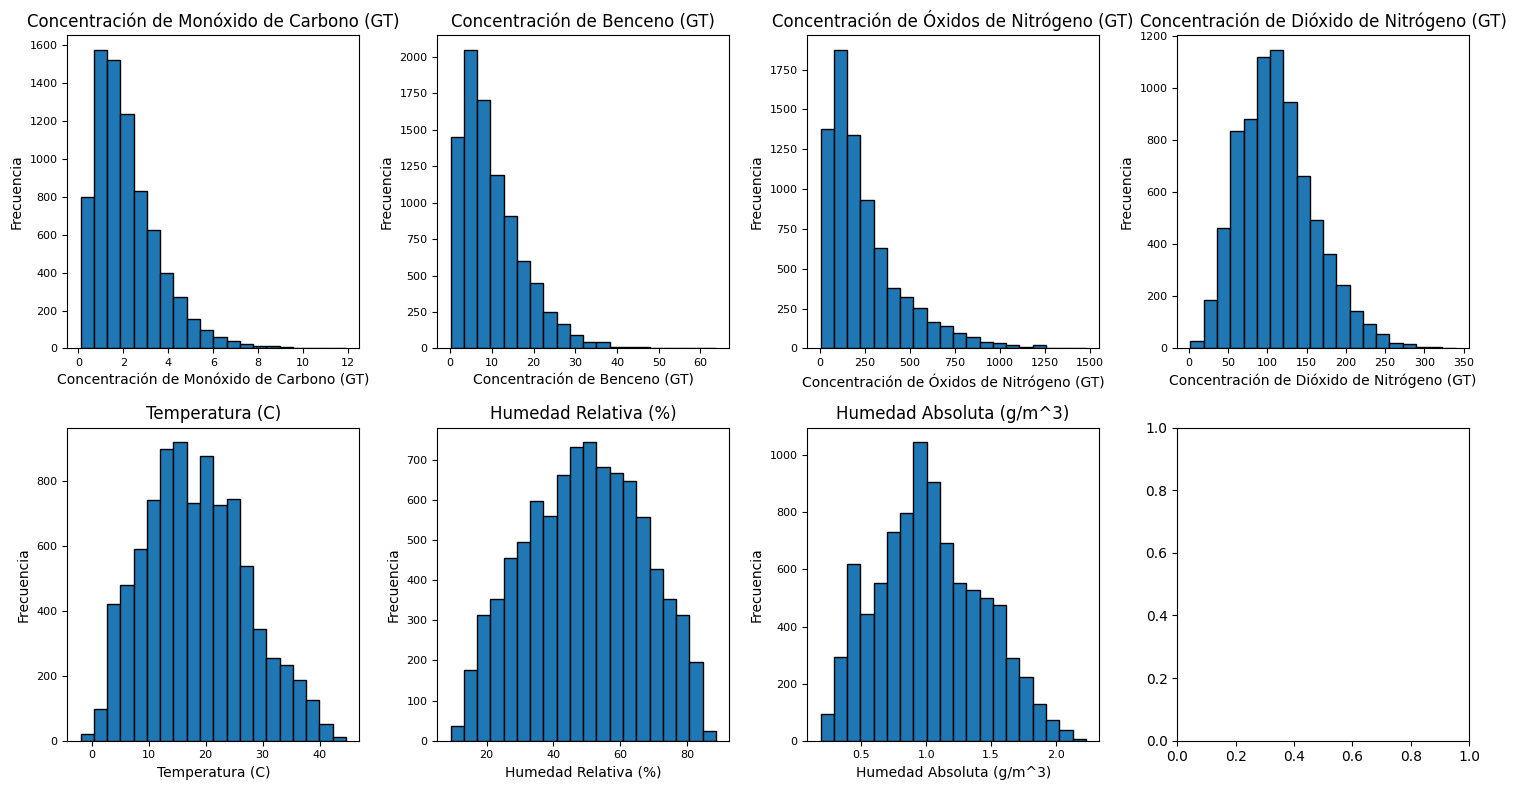

In [ ]:
import matplotlib.pyplot as plt

variables_a_visualizar = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
titulos_variables = {
    'CO(GT)': 'Concentración de Monóxido de Carbono (GT)',
    'C6H6(GT)': 'Concentración de Benceno (GT)',
    'NOx(GT)': 'Concentración de Óxidos de Nitrógeno (GT)',
    'NO2(GT)': 'Concentración de Dióxido de Nitrógeno (GT)',
    'T': 'Temperatura (C)',
    'RH': 'Humedad Relativa (%)',
    'AH': 'Humedad Absoluta (g/m^3)'
}

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()  # Para facilitar la iteración sobre los subplots

for i, variable in enumerate(variables_a_visualizar):
    ax = axes[i]
    ax.hist(datos[variable], bins=20, edgecolor='black')
    ax.set_title(titulos_variables.get(variable, variable))
    ax.set_xlabel(titulos_variables.get(variable, variable))
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()



**Curtosis y sesgos**

- Sesgo (skew): dice si la distribución está cargada hacia la izquierda (negativo) o derecha (positivo).

CO(GT): Sesgo negativo fuerte → tiene muchos valores bajos, y pocos valores muy altos.

- Curtosis: dice cuántos datos hay en las colas (picos extremos).

C6H6(GT) y T: mucha curtosis, lo que sugiere presencia de valores extremos o outliers.

In [ ]:
from scipy.stats import kurtosis, skew

for col in ['CO(GT)', 'NO2(GT)', 'C6H6(GT)', 'T']:
    print(f"{col} → Sesgo: {skew(datos[col].dropna())}, Curtosis: {kurtosis(datos[col].dropna())}")


CO(GT) → Sesgo: 1.3694850245801748, Curtosis: 2.665259732505648
NO2(GT) → Sesgo: 0.6215934292065955, Curtosis: 0.4639531926528857
C6H6(GT) → Sesgo: 1.361305110305938, Curtosis: 2.4866548428377415
T → Sesgo: 0.3093051785967567, Curtosis: -0.4566873766739854


Boxplots curtosis y outliers

Siendo Benceno con la correlacion mas alta con CO y las restantes que le siguen.

Dada la naturaleza del dataset, que registra datos de calidad del aire en una zona contaminada, se consideró que estos valores extremos podrían representar picos reales de contaminación o condiciones ambientales inusuales que son relevantes para comprender el fenómeno estudiado.



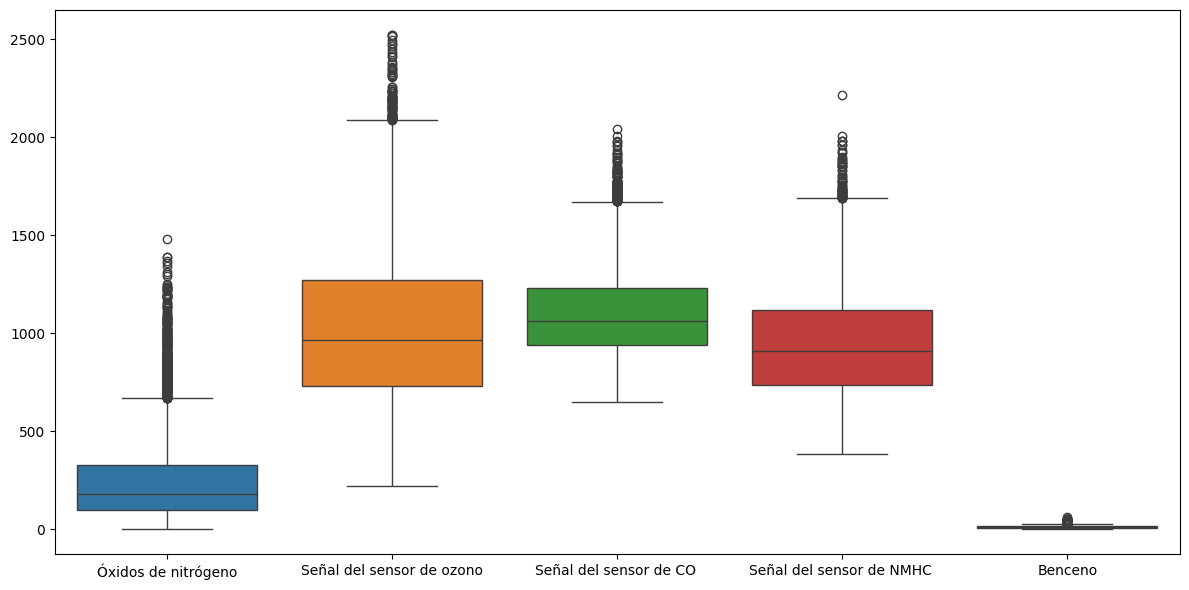

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=datos[['NOx(GT)', 'PT08.S5(O3)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'C6H6(GT)',]])
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=['Óxidos de nitrógeno',
                   'Señal del sensor de ozono',
                   'Señal del sensor de CO ',
                   'Señal del sensor de NMHC ',
                   'Benceno'])
plt.tight_layout() # espaciado para que no se corten los nombres
plt.show()

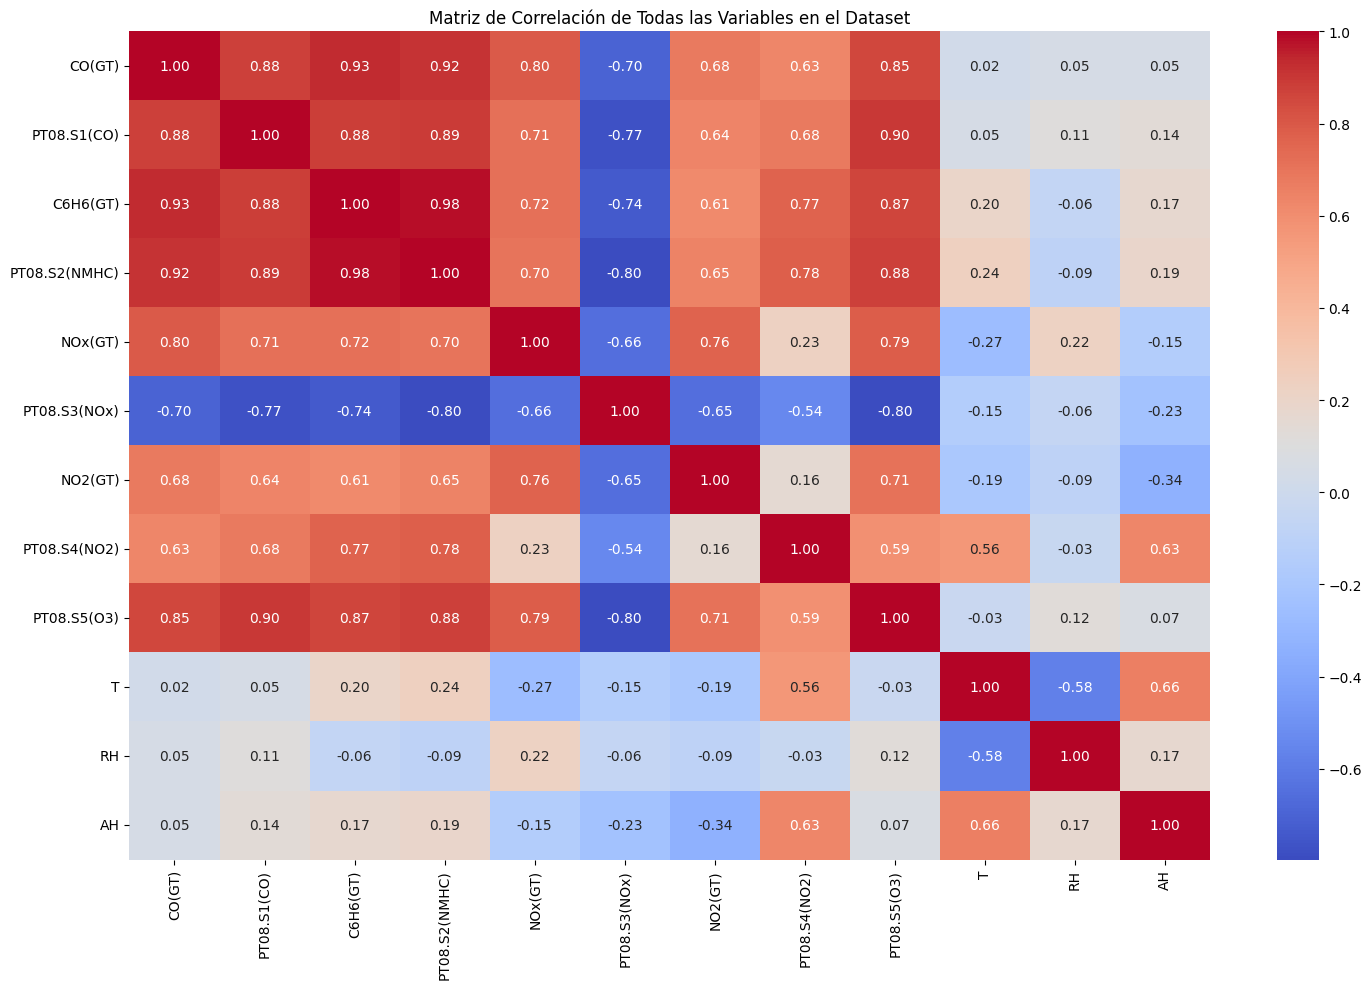

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación para TODAS las variables.
correlation = datos.corr()

plt.figure(figsize=(15, 10))  # Ajusta el tamaño
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matriz de Correlación de Todas las Variables en el Dataset")

plt.tight_layout() # Ajusta el layout
plt.show()


**scatterplot entre variables claves**

Resumen de las Relaciones Visualizadas en los Scatter Plots:
Relaciones Positivas con CO(GT) (a mayor valor de la predictora, mayor valor de CO(GT)):

- PT08.S1(CO):  relación lineal positiva. Los puntos se agrupan estrechamente a lo largo de una línea ascendente. Esto era esperado ya que este sensor está diseñado para medir CO.
- C6H6(GT): relación positiva clara y bastante fuerte, aunque quizás con un poco más de dispersión que PT08.S1(CO). La tendencia ascendente es evidente.
- PT08.S2(NMHC):  relación positiva notable, aunque con más dispersión en los valores más altos de CO(GT). La tendencia general es ascendente.
- PT08.S5(O3): relación positiva, aunque con una dispersión considerable. A medida que aumenta la lectura del sensor de O3, tiende a aumentar el CO(GT), pero la relación no es tan estrecha como las anteriores.
- NOx(GT): relación positiva, aunque con una dispersión significativa, especialmente en los valores más altos de NOx. La tendencia general es ascendente.
- NO2(GT):relación positiva, pero parece ser más débil y con mayor dispersión que las anteriores.

KeyError: 'PT08.S6(NMHC)'

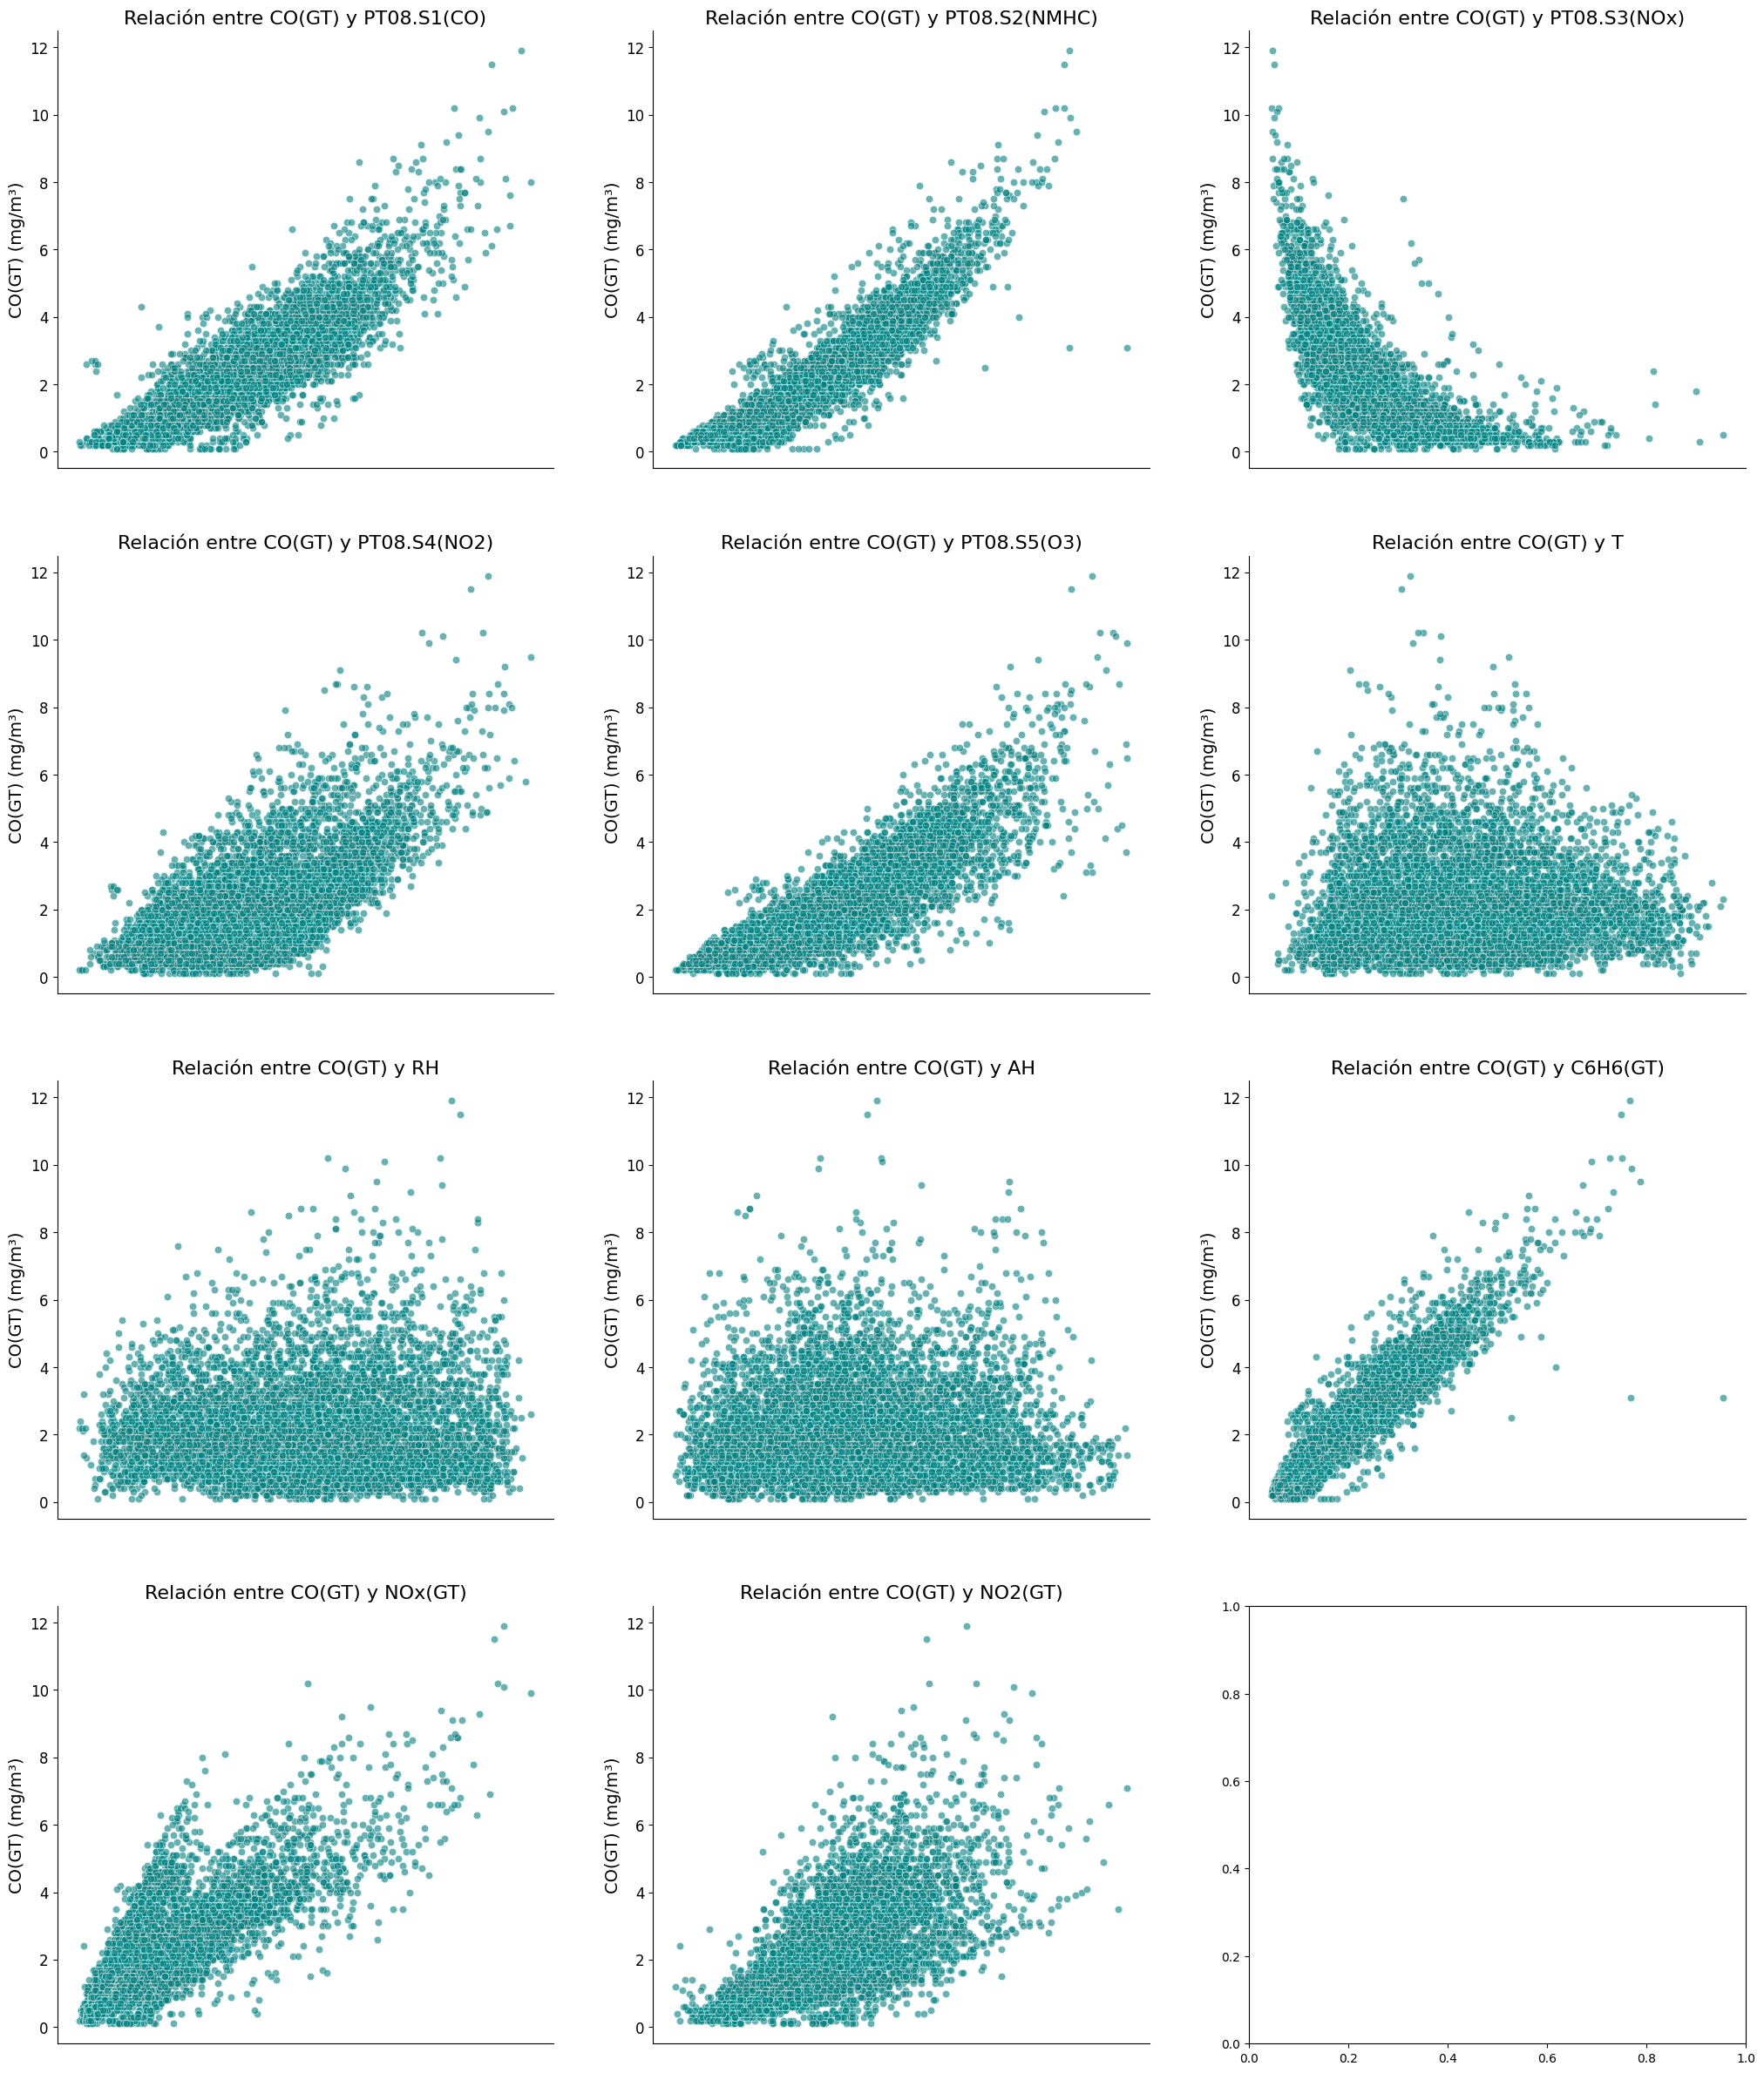

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# variables predictoras
predictoras_completas = [
    'PT08.S1(CO)',
    'PT08.S2(NMHC)',
    'PT08.S3(NOx)',
    'PT08.S4(NO2)',
    'PT08.S5(O3)',
    'T',
    'RH',
    'AH',
    'C6H6(GT)',
    'NOx(GT)',
    'NO2(GT)',
    'PT08.S6(NMHC)'  # Verifica si este nombre es correcto
]

# Variable objetivo
objetivo = 'CO(GT)'

# Crear los scatter plots
plt.figure(figsize=(25, 30))
for i, predictor in enumerate(predictoras_completas):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=datos[predictor], y=datos[objetivo], alpha=0.6, color='teal')
    plt.title(f'Relación entre CO(GT) y {predictor}', fontsize=16)
    plt.xlabel('')  # Eliminar etiqueta del eje X
    plt.xticks([])  # Eliminar los valores del eje X
    plt.ylabel('CO(GT) (mg/m³)', fontsize=14)
    plt.yticks(fontsize=12)
    sns.despine()

plt.tight_layout(pad=2.0, h_pad=4.0, w_pad=3.0)
plt.suptitle('Scatter Plots de Todas las Variables Predictoras vs. Monóxido de Carbono (CO(GT))', fontsize=20, y=1.03)
plt.show()


Correlaciones Positivas (en orden de relevancia descendente):

- PT08.S1(CO) (0.88): La señal del sensor de CO muestra una correlación positiva muy alta con la concentración real de CO. Esto es lógico ya que el sensor está diseñado para medir este gas.
- C6H6(GT) (0.93): La concentración real de Benceno tiene una correlación positiva muy alta con el CO. Esto sugiere que sus fuentes de emisión están fuertemente relacionadas (principalmente tráfico vehicular y combustión).
- PT08.S2(NMHC) (0.92): La señal del sensor de hidrocarburos no metánicos también muestra una correlación positiva muy alta con el CO, lo que indica una fuente de emisión común (combustión incompleta).
- PT08.S5(O3) (0.85): La señal del sensor de ozono tiene una correlación positiva alta con el CO. Aunque la relación no es directa, podría indicar condiciones atmosféricas o patrones de tráfico que favorecen la acumulación de ambos.
- NOx(GT) (0.80): La concentración real de óxidos de nitrógeno muestra una correlación positiva alta con el CO, debido a que ambos son productos de la combustión a alta temperatura.
- NO2(GT) (0.68): La concentración real de dióxido de nitrógeno (un componente de los NOx) tiene una correlación positiva moderada con el CO.
- PT08.S4(NO2) (0.63): La señal del sensor de dióxido de nitrógeno muestra una correlación positiva moderada con el CO.


Correlación Negativa:

- PT08.S3(NOx) (-0.70): La señal del sensor de NOx tiene una correlación negativa moderada a alta con el CO. Esto podría indicar una respuesta compleja del sensor o dinámicas químicas inversas en ciertas condiciones.

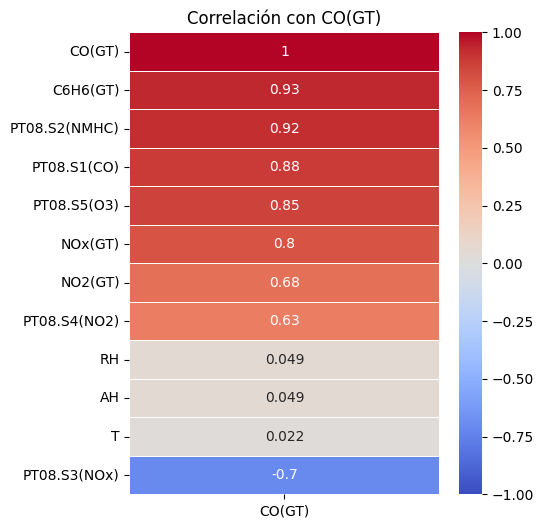

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['CO(GT)']
explanatory_vars = ['NO2(GT)', 'NOx(GT)','PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)', 'T', 'RH', 'AH']


for pollutant in pollutants:
    correlation_pollutant = datos[explanatory_vars + [pollutant]].corr()
    plt.figure(figsize=(5, 6))
    sns.heatmap(correlation_pollutant[[pollutant]].sort_values(by=pollutant, ascending=False),
                annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
    plt.title(f'Correlación con {pollutant}')
    plt.show()

In [ ]:
print("Valores NaN en df['CO(GT)'] antes de la transformación:") #que no haremos por el cambio de modelo de ML
print(datos['CO(GT)'].isnull().sum())

Valores NaN en df['CO(GT)'] antes de la transformación:
1683


In [ ]:
datos_cleaned = datos.dropna(subset=['CO(GT)'])

Frecuencia Temporal:

La frecuencia temporal de los datos es horaria.

In [ ]:
import pandas as pd

if 'Datetime' in datos.index.names:
    time_diffs = datos.index.to_series().diff().dropna()

    print("Frecuencia de las diferencias de tiempo entre registros:")
    print(time_diffs.value_counts())
else:
    print("La columna 'Datetime' no está establecida como índice.")

Frecuencia de las diferencias de tiempo entre registros:
Datetime
0 days 01:00:00    9356
Name: count, dtype: int64


In [ ]:
print("Índice del DataFrame 'datos':")
print(datos.index)
print("\nColumnas del DataFrame 'datos':")
print(datos.columns)

Índice del DataFrame 'datos':
DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=9357, freq=None)

Columnas del DataFrame 'datos':
Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')


##Análisis de las Propiedades Temporales de la Serie de CO(GT)

Resumen del Patrón Diario Promedio de CO(GT):

El gráfico muestra un patrón diario claro en la concentración promedio de Monóxido de Carbono (CO). Los niveles son más bajos durante la noche y la madrugada (aproximadamente desde la medianoche hasta las 6 AM). A partir de las 7 AM, se observa un rápido aumento que alcanza un pico alrededor de las 8-9 AM, probablemente coincidiendo con el tráfico matutino. Los niveles disminuyen gradualmente durante la mañana y vuelven a aumentar por la tarde, con un segundo pico alrededor de las 18-19 PM, asociado al tráfico vespertino. Posteriormente, la concentración de CO desciende de nuevo durante la noche. En resumen, el CO presenta dos picos diarios, uno por la mañana y otro por la tarde, con valores mínimos durante las horas de menor actividad.

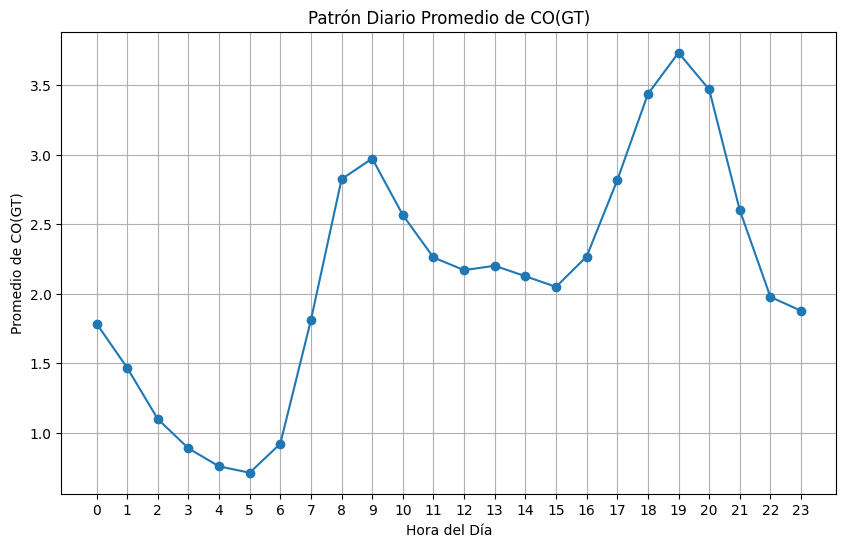

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if 'CO(GT)' in datos.columns and 'Datetime' in datos.index.names:
    # Patrón Diario Promedio de CO(GT)
    datos['Hour'] = datos.index.hour
    hourly_pattern = datos.groupby('Hour')['CO(GT)'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o')
    plt.xlabel('Hora del Día')
    plt.ylabel('Promedio de CO(GT)')
    plt.title('Patrón Diario Promedio de CO(GT)')
    plt.grid(True)
    plt.xticks(range(24))
    plt.show()
    datos.drop(columns=['Hour'], inplace=True)
else:
    print("La columna 'CO(GT)' no está presente en las columnas o 'Datetime' no está en el índice.")

Resumen del Patrón Mensual Promedio de CO(GT) y Énfasis en Agosto:

El gráfico ilustra la variación mensual promedio de la concentración de Monóxido de Carbono (CO) a lo largo del año. Se observa una tendencia general a tener niveles más elevados de CO durante los meses más fríos (aproximadamente desde octubre hasta marzo), con picos notables al inicio y al final del año. En contraste, los niveles de CO tienden a ser más bajos durante los meses de primavera y verano.

Lo más destacable del gráfico es la disminución drástica y significativa en la concentración promedio de CO que ocurre específicamente en el mes 8 (agosto). Este mes presenta el valor promedio de CO más bajo de todo el año, marcando un punto de inflexión en la tendencia general.

Segun esta hipotesis esta marcada reducción en agosto sugiere la influencia de factores estacionales particulares, es probable que esta disminución se deba a una combinación de la reducción de la actividad humana, principalmente el tráfico vehicular debido a las vacaciones de verano generalizadas en Italia durante agosto, y condiciones meteorológicas más favorables para la dispersión de los contaminantes, como una mayor inestabilidad atmosférica y patrones de viento que evitan la acumulación de CO a nivel del suelo. La ausencia de la necesidad de calefacción en este mes cálido también contribuye a la disminución de las emisiones relacionadas con la combustión residencial.

En esencia, el mes de agosto se presenta como una anomalía dentro del patrón anual, caracterizado por una mejora notable en la calidad del aire en términos de concentración de Monóxido de Carbono, presumiblemente impulsada por una menor actividad antropogénica y condiciones ambientales que favorecen la dispersión de los contaminantes.



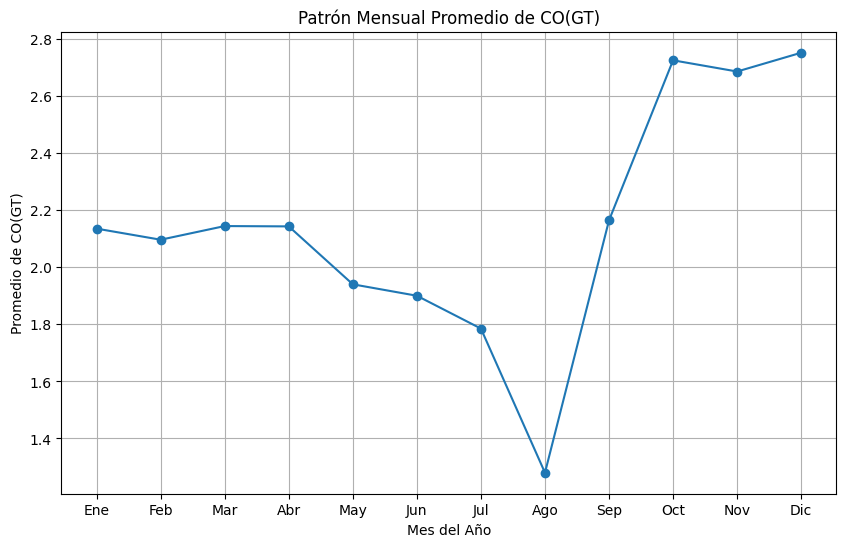

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_avg_co = datos.groupby(datos.index.month)['CO(GT)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_co.index, monthly_avg_co.values, marker='o')
plt.title('Patrón Mensual Promedio de CO(GT)')
plt.xlabel('Mes del Año')
plt.ylabel('Promedio de CO(GT)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)
plt.show()



---


**Autocorrelacion serie temporal** La Función de Autocorrelación (ACF) es una herramienta fundamental que tiene una relación directa tanto con la estacionalidad como con la estacionariedad de una serie temporal.

En Resumen, este Gráfico de Autocorrelación para CO(GT) nos Dice que:

La concentración de Monóxido de Carbono tiene una fuerte dependencia temporal a corto plazo: El valor actual está muy influenciado por el valor inmediatamente anterior. Existen posibles patrones cíclicos: Hay indicios de ciclos diarios y, posiblemente, semanales en la concentración de CO. La dependencia temporal directa se desvanece con el tiempo: Las concentraciones de CO en momentos muy distantes en el pasado tienen poca o ninguna correlación directa con la concentración actual. Esta información es valiosa para entender la dinámica de la contaminación por CO y puede ser útil al construir modelos predictivos de series temporales, ya que sugiere que los valores pasados de CO son predictores importantes de los valores futuros.

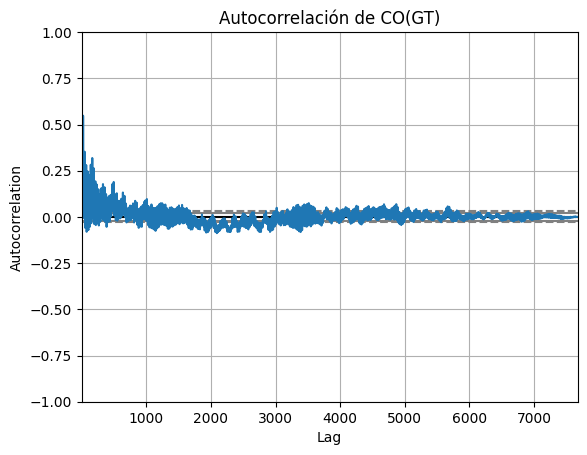

In [ ]:
from pandas.plotting import autocorrelation_plot

# Autocorrelación para CO(GT)
autocorrelation_plot(datos['CO(GT)'].dropna())
plt.title("Autocorrelación de CO(GT)")
plt.show()

**Prueba de Estacionariedad**


**¿Hay estacionalidad y estacionariedad?**

- Estacionalidad: Sí, observamos fluctuaciones mensuales en el promedio de CO(GT) dentro del año. Sin embargo, con datos de un solo año, no podemos confirmar una estacionalidad anual consistente que se repita año tras año. Necesitaríamos datos de varios años para eso. Por ahora, vemos variaciones intra-anuales.

- Estacionariedad: Según la prueba ADF, la serie de CO(GT) es estacionaria. Esto significa que, estadísticamente, su media y varianza parecen ser constantes a lo largo del tiempo (después de tener en cuenta las fluctuaciones a corto plazo). Sin embargo, esta conclusión no niega la presencia de patrones cíclicos diarios y las variaciones mensuales. La estacionariedad en el sentido del ADF se refiere más a la ausencia de tendencias estocásticas o raíces unitarias.

La clave para reconciliar esto:

Una serie puede ser estacionaria (según pruebas como el ADF) pero aún así tener patrones cíclicos predecibles (como el patrón diario) o variaciones intra-anuales.

In [ ]:
from statsmodels.tsa.stattools import adfuller

serie_co = datos['CO(GT)'].dropna()

# prueba ADF
result = adfuller(serie_co)


print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}, {value}')

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia común
if result[1] > alpha:
    print('La serie NO es estacionaria (rechazamos la hipótesis nula)')
else:
    print('La serie ES estacionaria (no rechazamos la hipótesis nula)')

Estadístico ADF: -9.556031147206314
Valor p: 2.497591755460772e-16
Valores críticos:
   1%, -3.4312065535348215
   5%, -2.8619185328129757
   10%, -2.5669714885183432
La serie ES estacionaria (no rechazamos la hipótesis nula)


#Modelo de ML seleccionado: Random Forest

Nuestro objetivo principal en este proyecto se centró en predecir la concentración de Monóxido de Carbono (CO(GT)). Por lo tanto, priorizamos aquellas variables que mostraban una relación más directa y fuerte con el CO(GT) en nuestro análisis exploratorio inicial (especialmente en los scatter plots y la matriz de correlación).


Y = datos CO(GT): Monóxido de carbono

X = datos

  -  'C6H6(GT)',      # Benceno (correlación más alta)
  -   'PT08.S2(NMHC)',  # Señal del sensor de NMHC (segunda más alta)
  -   'PT08.S1(CO)',    # Señal del sensor de CO (tercera más alta)
  -   'PT08.S5(O3)',    # Señal del sensor de ozono (cuarta más alta)
  -   'NOx(GT)',       # Óxidos de nitrógeno (quinta más alta)
  -   'PT08.S3(NOx)'   # Señal del sensor de NOx (correlación negativa relevante)

Error Cuadrático Medio (MSE) en el conjunto de prueba (Random Forest con variables relevantes): 0.2192
Coeficiente de Determinación (R^2) en el conjunto de prueba (Random Forest con variables relevantes): 0.9020


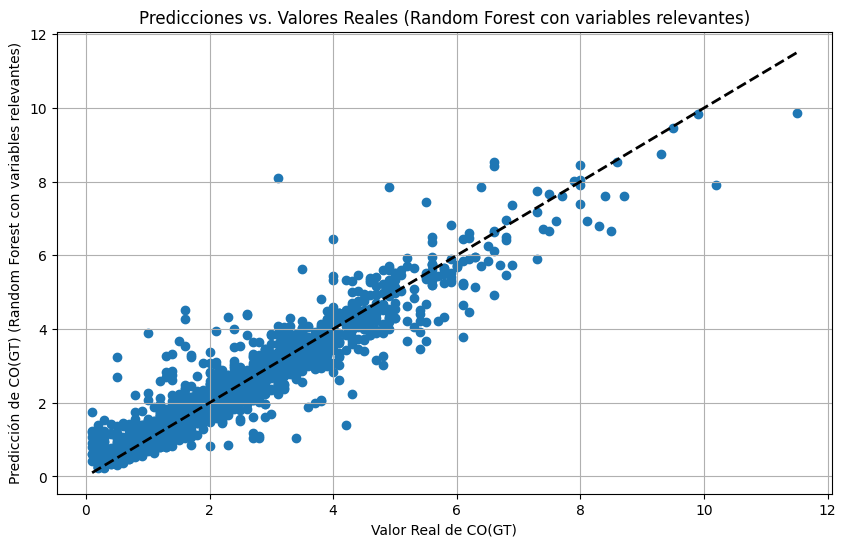

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

Y = datos['CO(GT)'] # Monóxido de carbono
X = datos[[
    'C6H6(GT)',      # Benceno (correlación más alta)
    'PT08.S2(NMHC)',  # Señal del sensor de NMHC (segunda más alta)
    'PT08.S1(CO)',    # Señal del sensor de CO (tercera más alta)
    'PT08.S5(O3)',    # Señal del sensor de ozono (cuarta más alta)
    'NOx(GT)',       # Óxidos de nitrógeno (quinta más alta)
    'PT08.S3(NOx)'   # Señal del sensor de NOx (correlación negativa relevante)
]].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#  Eliminar filas con NaN en los conjuntos de entrenamiento y prueba
train_data = pd.concat([X_train, y_train], axis=1)
train_data.dropna(subset=['CO(GT)'], inplace=True)
X_train = train_data.drop(columns=['CO(GT)'])
y_train = train_data['CO(GT)']

test_data = pd.concat([X_test, y_test], axis=1)
test_data.dropna(subset=['CO(GT)'], inplace=True)
X_test = test_data.drop(columns=['CO(GT)'])
y_test = test_data['CO(GT)']

#  Entrenar el modelo de Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Hacer predicciones en el conjunto de prueba
predictions_rf = rf_model.predict(X_test)

#  Evaluar el modelo
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

print(f'Error Cuadrático Medio (MSE) en el conjunto de prueba (Random Forest con variables relevantes): {mse_rf:.4f}')
print(f'Coeficiente de Determinación (R^2) en el conjunto de prueba (Random Forest con variables relevantes): {r2_rf:.4f}')

# Opcional: Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_rf)
plt.xlabel('Valor Real de CO(GT)')
plt.ylabel('Predicción de CO(GT) (Random Forest con variables relevantes)')
plt.title('Predicciones vs. Valores Reales (Random Forest con variables relevantes)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de predicción perfecta
plt.grid(True)
plt.show()

In [ ]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("\nImportancia de las Características (Random Forest):")
print(importances_df)


Importancia de las Características (Random Forest):
         Feature  Importance
1  PT08.S2(NMHC)    0.645720
0       C6H6(GT)    0.166987
4        NOx(GT)    0.113450
2    PT08.S1(CO)    0.033357
3    PT08.S5(O3)    0.021595
5   PT08.S3(NOx)    0.018890


Conclusión del Modelo Random Forest para la Predicción de CO(GT):

Coeficiente de Determinación (R^2): El valor de 0.9020 indica que el modelo explica aproximadamente el 90.20% de la varianza en la concentración real de CO en el conjunto de prueba. Esto sugiere que el modelo es capaz de capturar una gran parte de los patrones y las relaciones entre las variables predictoras y el CO.

Error Cuadrático Medio (MSE): El valor de 0.2192 representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales de CO. Un valor relativamente bajo sugiere que las predicciones del modelo están, en promedio, bastante cerca de los valores reales.

Gráfico de Predicciones vs. Valores Reales: El gráfico muestra una tendencia clara de alineación entre las predicciones del modelo y los valores reales de CO. Los puntos se agrupan razonablemente cerca de la línea diagonal punteada (que representa una predicción perfecta). Sin embargo, se observa cierta dispersión, especialmente en los valores más altos de CO, lo que indica que el modelo no es perfecto y existen errores en las predicciones individuales.

Importancia de las Características: La importancia de las características revela que PT08.S2(NMHC) (Señal del sensor de NMHC) es, con diferencia, el predictor más influyente en el modelo. Le siguen en importancia C6H6(GT) (Benceno) y NOx(GT) (Óxidos de Nitrógeno). Las señales de los sensores de CO (PT08.S1(CO)) y ozono (PT08.S5(O3)), así como la señal del sensor de NOx (PT08.S3(NOx)), tienen una importancia menor, aunque aún contribuyen al modelo.

En resumen:

El modelo de Random Forest es capaz de predecir la concentración de Monóxido de Carbono con una precisión considerable, explicando una alta proporción de la varianza en los datos de prueba. La señal del sensor de hidrocarburos no metánicos (PT08.S2(NMHC)) emerge como el factor más importante para estas predicciones, seguido por la concentración de Benceno y los Óxidos de Nitrógeno.

Aunque el modelo muestra un buen rendimiento general, la dispersión observada en el gráfico de predicciones vs. valores reales sugiere que aún existen errores y que el modelo podría beneficiarse de una mayor optimización, la inclusión de otras variables relevantes o la exploración de diferentes algoritmos de modelado. Sin embargo, como punto de partida, este modelo proporciona una base sólida para la predicción de la concentración de Monóxido de Carbono.



---

Proyecto realizado con fines EDUCATIVOS y DE APRENDIZAJE